<a href="https://colab.research.google.com/github/karol10542/MachineLearning2021/blob/main/LAB_3_multi_armed_bandit_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
NUM_TRIALS = 10000 # ilosc prob 
BANDIT_PROBABILITIES = [0.2,0.5,0.75]
EPSILON = 0.1


In [41]:
class Bandit:
  def __init__(self,q): #q - prawdopodob, wspolczynnik zwycies
    self.q = q # wspolczynniki zwyciestwa
    self.q_estimate = 0. #wartosc szacunkowa w jaki sposob algo szacuje warotsci nagrody dla bandyty na ktorym gra
    self.N = 0. #ilosc prob

  def pull(self): 
      return np.random.random() < self.q #losowy przedzial od 0 do 1 i sprawdzac czy ta liczba jest mniejsza od prawdziwej wartosci prawdop

  def update(self,r): #zwieksza ilosc prob
        self.N+=1.
        self.q_estimate = ((self.N - 1)* self.q_estimate +r )/self.N # szacowanie wartosci iteracyjnie


mean estimate: 0.19420000000000012
mean estimate: 0.0
mean estimate: 0.0
total reward earned: 1942.0
overall win rate: 0.1942
num times selected each bandit: [10000.0, 0.0, 0.0]


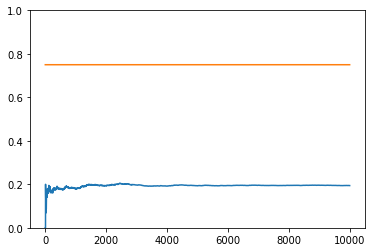

In [42]:
def experiment_greedy():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_greedy()

mean estimate: 0.20369999999999983
mean estimate: 0.0
mean estimate: 0.0
total reward earned: 2037.0
overall win rate: 0.2037
num times selected each bandit: [10000.0, 0.0, 0.0]


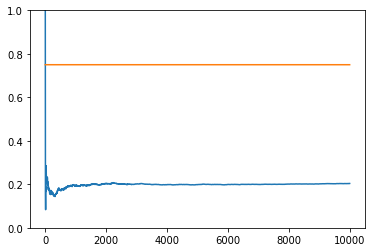

In [43]:
def experiment_optimisitc():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_greedy()

optimal bandit: 2
mean estimate: 0.234375
mean estimate: 0.48882681564245783
mean estimate: 0.7587427590645786
total reward earned: 7323.0
overall win rate: 0.7323
num times selected each bandit: [320.0, 358.0, 9322.0]
num times selected optimal bandit: 9322
num_times_explored: 1029
num_times_exploited: 8971


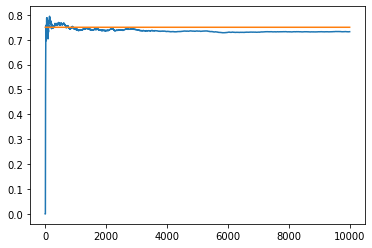

In [44]:
def experiment_epsilon():
  bandits = [Bandit(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_bandit = np.argmax([b.q for b in bandits])
  print("optimal bandit:", optimal_bandit)

  for i in range(NUM_TRIALS):
    if np.random.random() < EPSILON:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.q_estimate for b in bandits])

    if j == optimal_bandit:
      num_optimal += 1

    r = bandits[j].pull()

    rewards[i] = r

    bandits[j].update(r)

    
  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])
  print("num times selected optimal bandit:", num_optimal)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_epsilon()